Step 1: Load the Data

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from scipy.stats import zscore

In [3]:
#Load Dataset and look for first few lines
dataset = pd.read_csv("netflix-data.csv")
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
dataset.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
#Look for last few lines of the dataset
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
dataset.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
dataset.shape

(8807, 12)

Step 2: Clean the Data

In [10]:
#total missing values
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
#remove duplicate row
dataset.drop_duplicates(inplace=True)

In [12]:
dataset.duplicated().sum()

0

In [13]:
# missing value handling
dataset.fillna({'director': 'Unknown', 'cast': 'Unknown', 'country': 'Unknown', 'rating': 'Unknown'}, inplace=True)
dataset.dropna(subset=['date_added', 'duration'], inplace=True)

In [14]:
dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
#Removing spaces from the date 
dataset['date_added'] = dataset['date_added'].str.strip()

In [16]:
# Convert 'date_added' column to datetime format 
dataset['date_added'] = pd.to_datetime(dataset['date_added'], format="%B %d, %Y")

In [17]:
# Convert 'duration' column 
dataset['duration'] = dataset['duration'].astype(str)  
dataset['duration'] = dataset['duration'].str.extract(r'(\d+)')  
dataset['duration'] = dataset['duration'].astype(float).astype(int)

Step 3: Exploratory Data Analysis (EDA)

In [19]:
print(dataset.describe())  
print(dataset.nunique())

                          date_added  release_year     duration
count                           8794   8794.000000  8794.000000
mean   2019-05-17 13:29:44.034568960   2014.183534    69.920173
min              2008-01-01 00:00:00   1925.000000     1.000000
25%              2018-04-06 00:00:00   2013.000000     2.000000
50%              2019-07-02 00:00:00   2017.000000    88.000000
75%              2020-08-19 00:00:00   2019.000000   106.000000
max              2021-09-25 00:00:00   2021.000000   312.000000
std                              NaN      8.823527    50.797005
show_id         8794
type               2
title           8794
director        4528
cast            7682
country          749
date_added      1714
release_year      74
rating            15
duration         210
listed_in        513
description     8762
dtype: int64


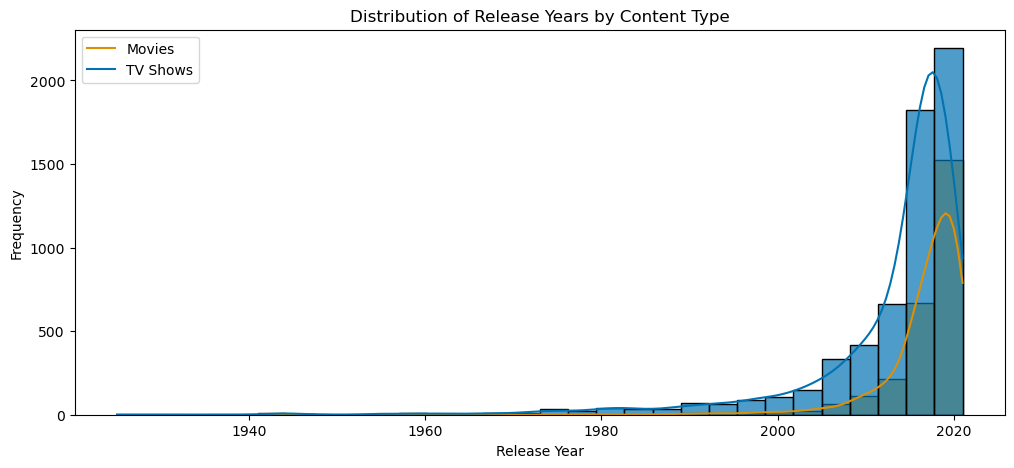

In [20]:
plt.figure(figsize = (12, 5))
sns.histplot(dataset, x = "release_year", hue = "type", bins = 30, kde = True, palette = "colorblind", alpha = 0.7)
plt.title("Distribution of Release Years by Content Type")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.legend(["Movies", "TV Shows"])
plt.show()

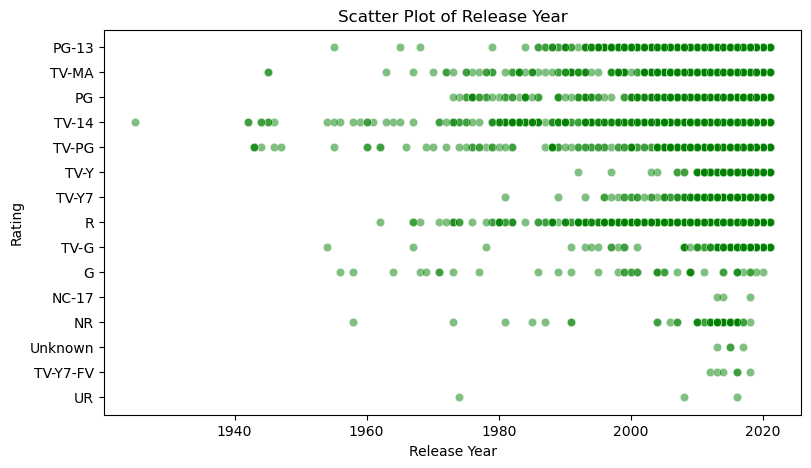

In [23]:
plt.figure(figsize = (9,5))
sns.scatterplot(x  = dataset['release_year'], y = dataset['rating'], alpha = 0.5, color = 'green')
plt.title('Scatter Plot of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.show()

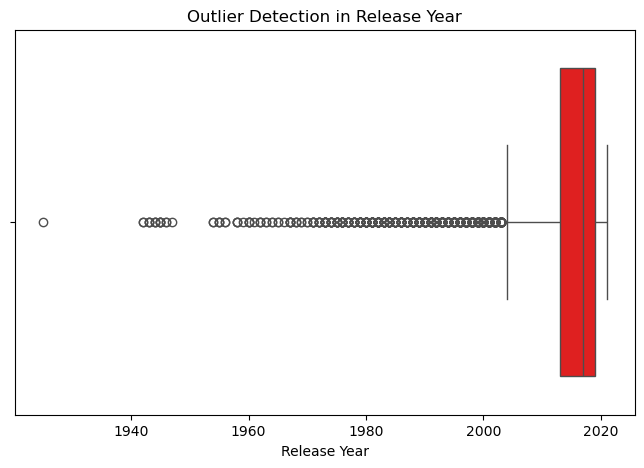

In [24]:
plt.figure(figsize = (8, 5))
sns.boxplot(x = dataset['release_year'], color = "red")
plt.title("Outlier Detection in Release Year")
plt.xlabel("Release Year")
plt.show()

In [25]:
z_scores = np.abs(zscore(dataset[['release_year']]))
outliers = (z_scores > 3).sum()
print(f"Total outliers in the release_year: {outliers.iloc[0]}")

Total outliers in the release_year: 217


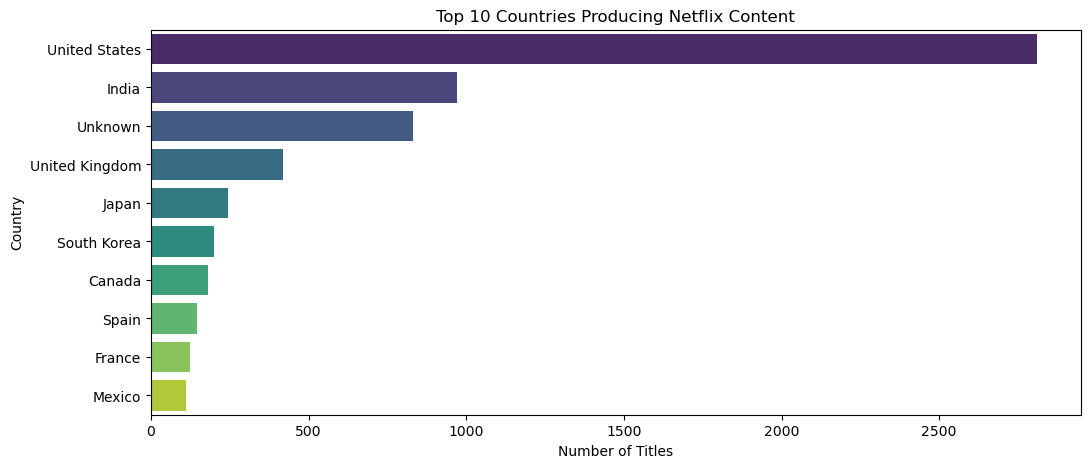

In [26]:
plt.figure(figsize = (12, 5))
top_countries = dataset['country'].value_counts().head(10)
sns.barplot(x = top_countries.values, y = top_countries.index, hue = top_countries.index, palette = 'viridis', legend = False)
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

    Step 4: Preprocess for ML

In [28]:
# Encoding categorical variable ('type') using LabelEncoder
lb_encoders = {}
label_columns = ['type']
for i in label_columns:
    lb_encoders[i] = LabelEncoder()
    dataset[i] = lb_encoders[i].fit_transform(dataset[i])

In [29]:
# Feature Scaling on 'release_year
scaler = MinMaxScaler()
dataset['release_year_scaled'] = scaler.fit_transform(dataset[['release_year']])

In [30]:
# One-Hot Encoding for 'rating' and 'listed_in'
ohc = OneHotEncoder(drop='first', sparse_output=False)  

In [31]:
# Fitting encoder
encoded_data = ohc.fit_transform(dataset[['rating', 'listed_in']])

In [32]:
# Getting column names dynamically
encoded_columns = ohc.get_feature_names_out(['rating', 'listed_in'])

In [33]:
# Creating DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=dataset.index)

In [34]:
# Concatenating with original DataFrame
dataset = pd.concat([dataset, encoded_df], axis=1)

In [35]:
# Dropping original 'rating' & 'listed_in' since they're now encoded
dataset.drop(columns=['rating', 'listed_in'], inplace=True)

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8794 entries, 0 to 8806
Columns: 537 entries, show_id to listed_in_Thrillers
dtypes: datetime64[ns](1), float64(527), int32(2), int64(1), object(6)
memory usage: 36.0+ MB


Split the Data

In [38]:
# Splitting dataset into 70% Training, 15% Validation, 15% Testing
train_data, temp_data = train_test_split(dataset, test_size=0.30, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.50, random_state=42)

In [39]:
#Print dataset shapes
print("Training Set Shape:", train_data.shape)
print("Validation Set Shape:", val_data.shape)
print("Testing Set Shape:", test_data.shape)

Training Set Shape: (6155, 537)
Validation Set Shape: (1319, 537)
Testing Set Shape: (1320, 537)


Summary Report
This report analyses and preprocesses a Netflix dataset that includes movie and TV show information. The goal was to clean, investigate, and get the data ready for use in machine learning.

LIMITATIONS:
1) The duration column contained a mix of numerical values (in minutes) and categorical labels (such as seasons). This required extra preprocessing to standardize the data for analysis.
2) When encoding categorical variables like rating and listed_in, we took measures to prevent excessive sparsity or overfitting. One-hot encoding was a simple yet effective method for converting text-based categories into numerical representations.
3) Handling missing values was essential to ensure smooth machine learning model training. Depending on the context, these values were either imputed with relevant data or removed to maintain data integrity.

Visualizations & Insights
1) The histogram of release_year indicates that Netflix has significantly increased its content production in recent years.Even though, movies outnumber TV Shows, but both have seen growth in recent years.
2) The USA dominates Netflix content production, followed by countries like India, the UK, and Canada. This suggests that Netflix primarily focuses on English-speaking markets, but global content is growing.
3) The Scatter plot analysis shows older content tends to have a wider spread in ratings, possibly due to classic films receiving higher critical acclaim over time.
4) The heatmap reveals that most numerical features have weak correlations with each other. This suggests that multiple independent factors influence Netflix content success rather than a single defining attribute.